Compare with analytical solution (sedov_100 seems to have t~8e-5)

In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude

In [2]:
time = np.arange(0, 0.1, 0.01)
analytic = 2/5 * time

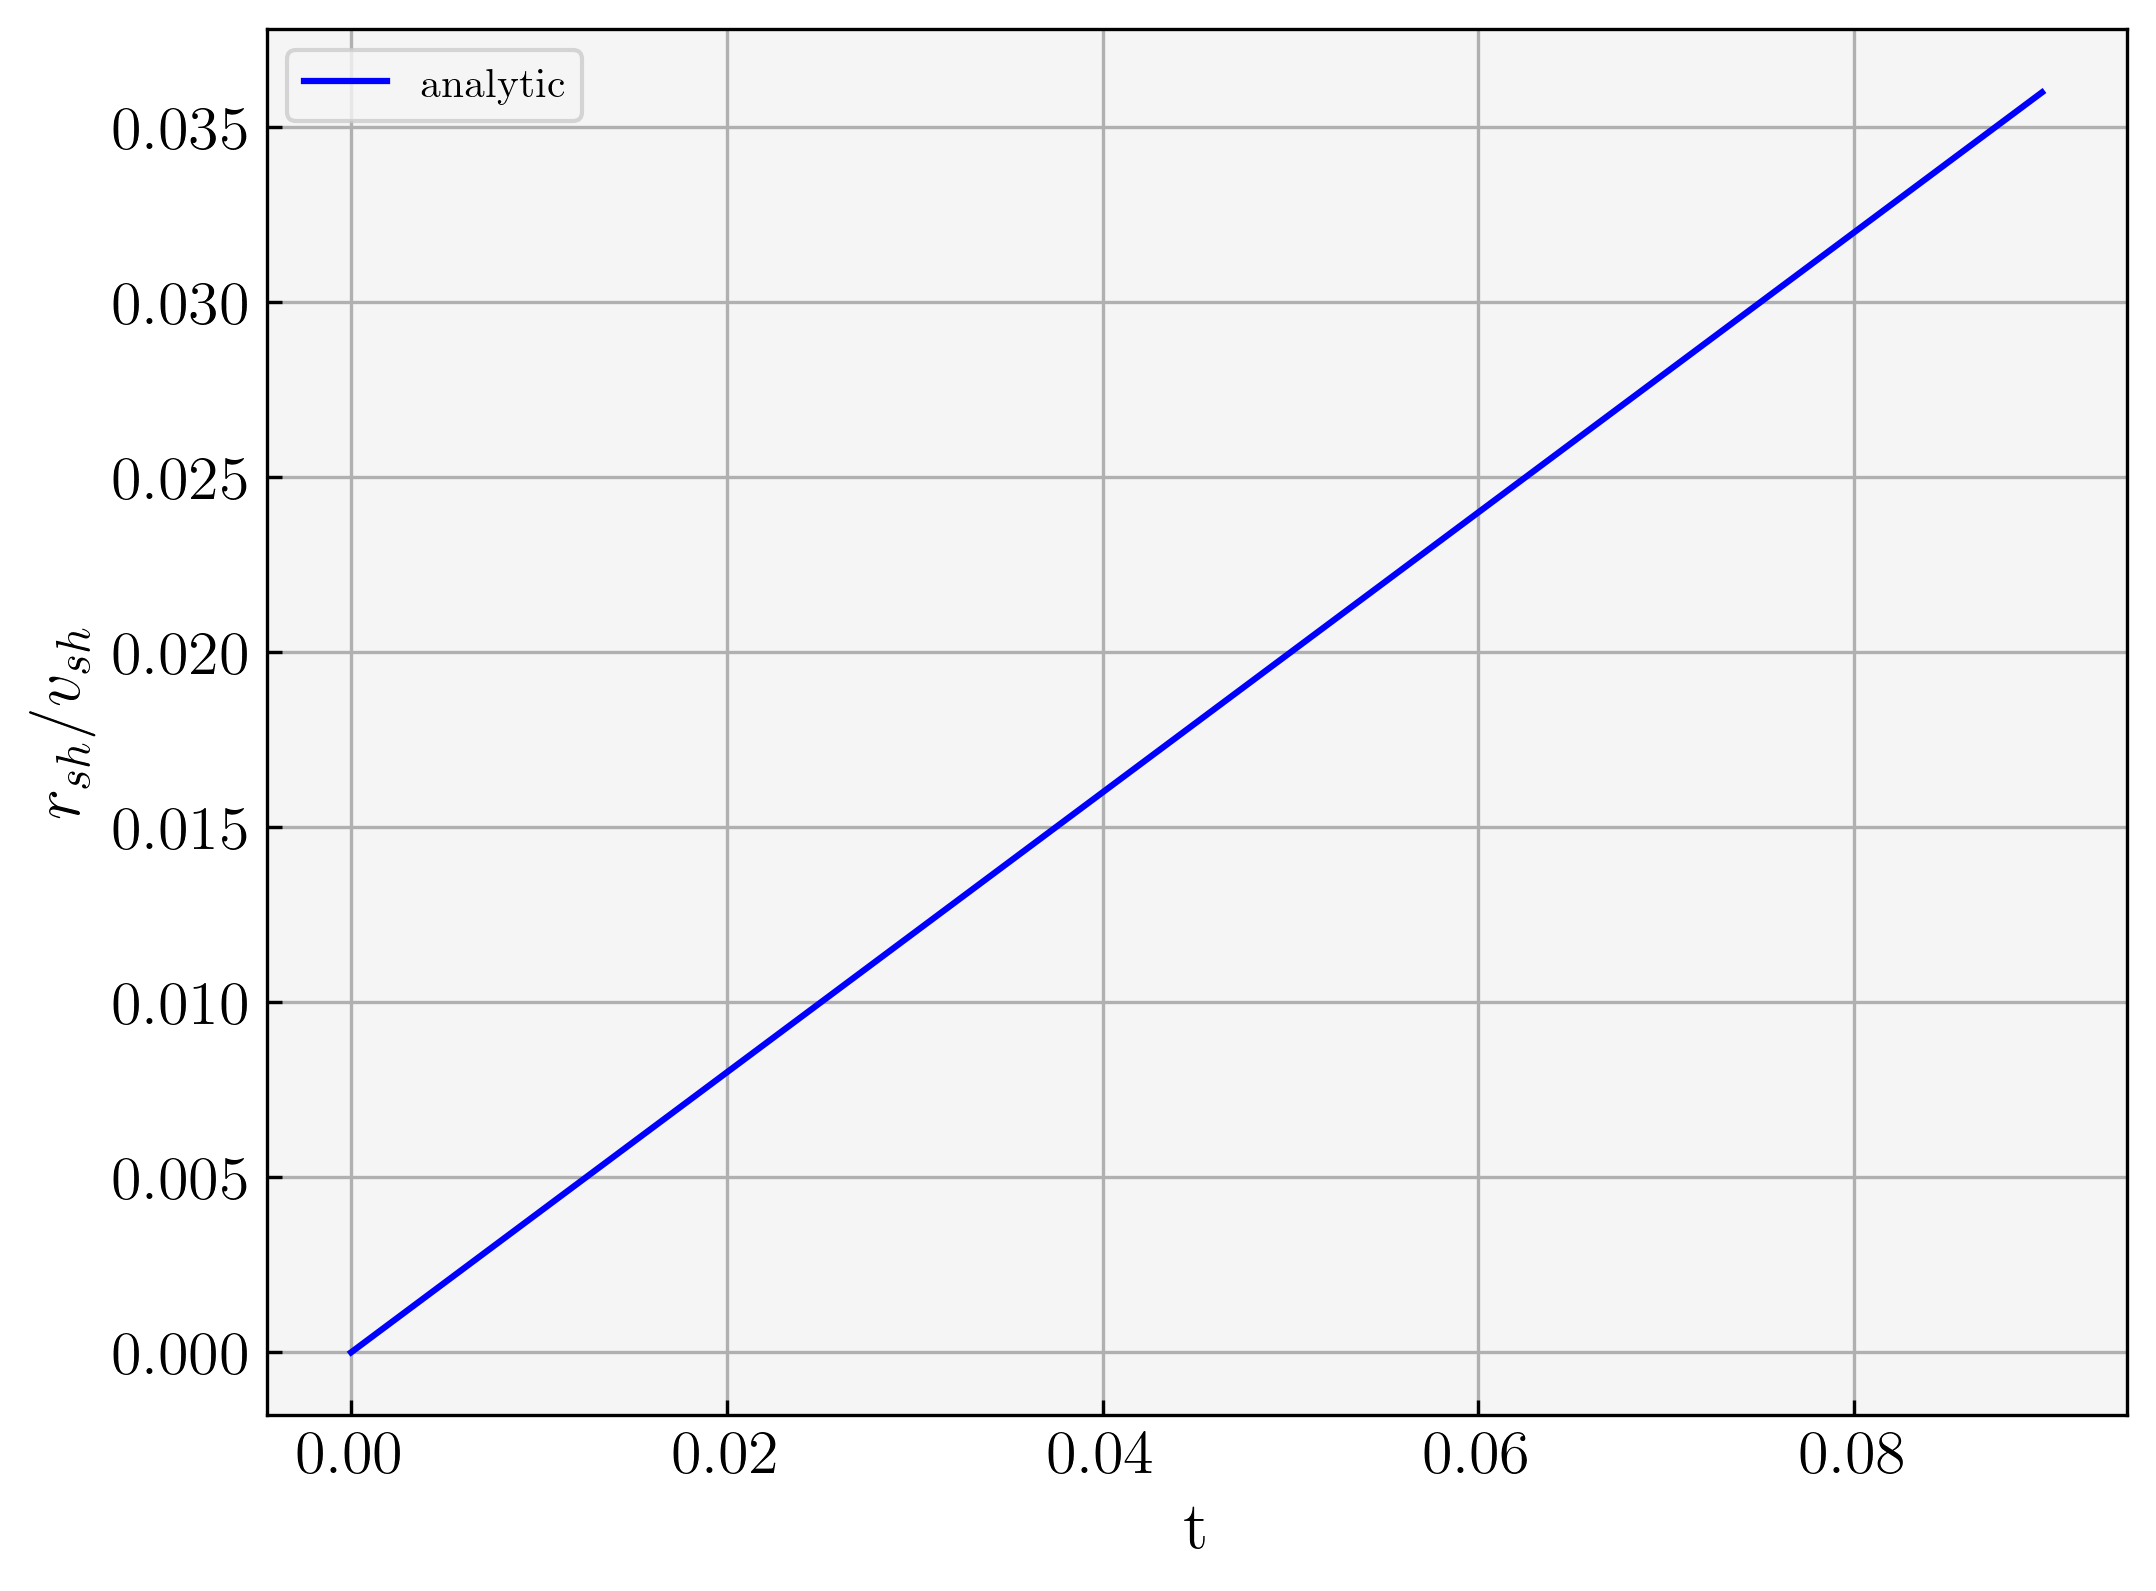

In [3]:
plt.plot(time, analytic, color = 'b', label = 'analytic')
plt.xlabel('t', fontsize = 16)
plt.ylabel(r'$r_{sh}/v_{sh}$', fontsize = 16)
plt.legend()
plt.grid()